In [21]:
import pandas as pd
pd.set_option("mode.copy_on_write", True)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import 

import sklearn.datasets

## EDA

In [22]:
data = sklearn.datasets.fetch_california_housing(as_frame=True)
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [23]:
df = data['frame']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
df = df.sample(frac=1)

In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [26]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
15197,7.0546,16.0,7.425926,0.985185,827.0,3.062963,32.91,-117.09,2.822
14,1.9167,52.0,4.262903,1.009677,1212.0,1.954839,37.85,-122.26,1.592
6527,2.1406,45.0,3.198795,0.987952,722.0,4.349398,34.06,-118.05,1.625
16838,4.5556,34.0,5.710074,0.990172,2282.0,2.803440,37.57,-122.48,2.490
6565,4.7300,45.0,5.922570,1.019769,1686.0,2.777595,34.19,-118.14,2.010
...,...,...,...,...,...,...,...,...,...
12660,1.4007,20.0,3.902111,1.124760,1281.0,2.458733,38.50,-121.44,0.975
2517,2.3250,32.0,6.344828,1.088670,562.0,2.768473,39.78,-122.16,0.696
15508,4.2357,11.0,4.863946,0.993197,921.0,3.132653,33.14,-117.08,1.609
12379,2.5477,33.0,4.020376,1.167712,2301.0,3.606583,33.78,-116.46,0.830


### Histograms

#### Note
`MedHouseVal` wird ab 5+ abgeschnitten -> alles über 5 wird als 5 zusammengefasst

<Axes: xlabel='MedHouseVal', ylabel='Count'>

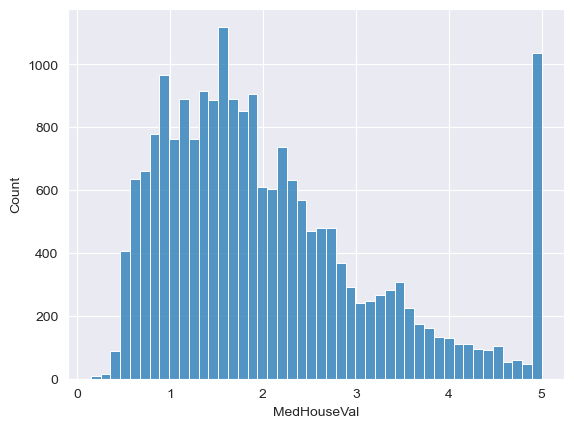

In [27]:
sns.histplot(df, x='MedHouseVal')

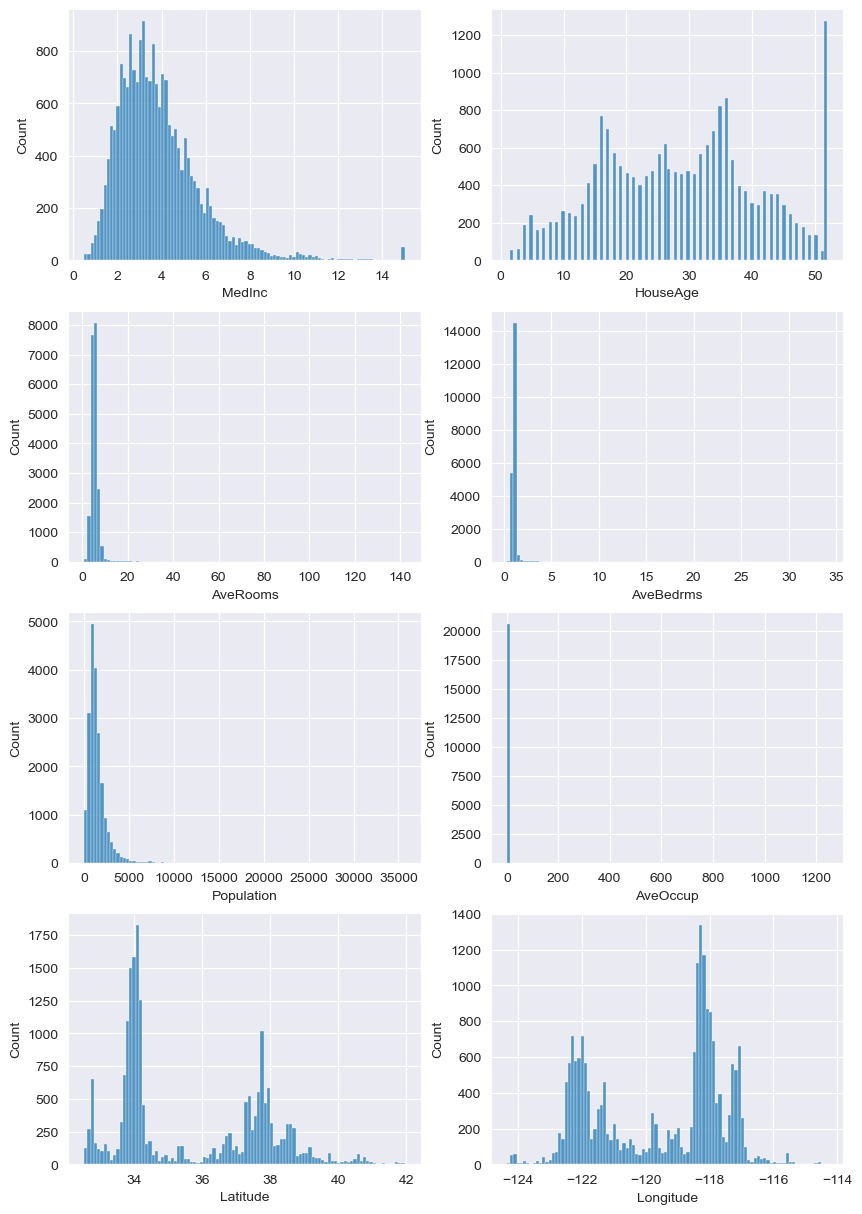

In [28]:
fig, axes = plt.subplots(4,2,figsize=(10,15))
axes_flat = axes.flatten()
for ix, feat in enumerate(data.feature_names):
    sns.histplot(df, x=feat,  bins=100, ax=axes_flat[ix])

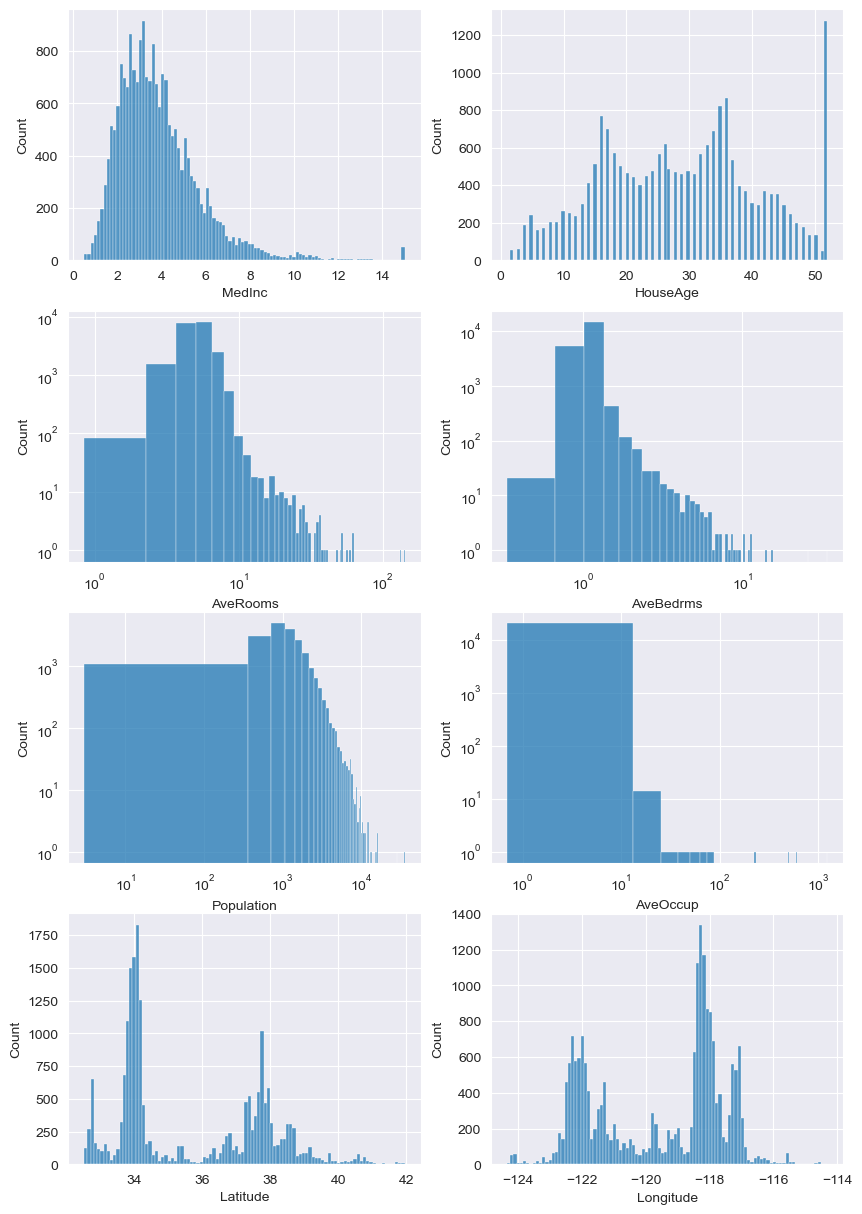

In [29]:
axes_flat[2].set_yscale('log')
axes_flat[2].set_xscale('log')
axes_flat[3].set_yscale('log')
axes_flat[3].set_xscale('log')
axes_flat[4].set_yscale('log')
axes_flat[4].set_xscale('log')
axes_flat[5].set_yscale('log')
axes_flat[5].set_xscale('log')

fig

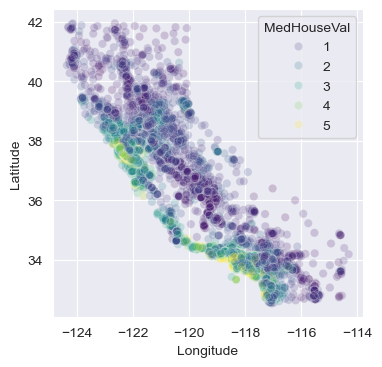

In [30]:
fig = plt.figure(figsize=(4,4))
_ = sns.scatterplot(
    df,
    x="Longitude",
    y="Latitude",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.2
)

### Data Clipping

In [31]:
df.AveRooms = df.AveRooms.clip(0,30)
df.AveBedrms = df.AveBedrms.clip(0,6)
df.Population = df.Population.clip(0, 10_000)
df.AveOccup = df.AveOccup.clip(0, 10)

### Correlation Plots

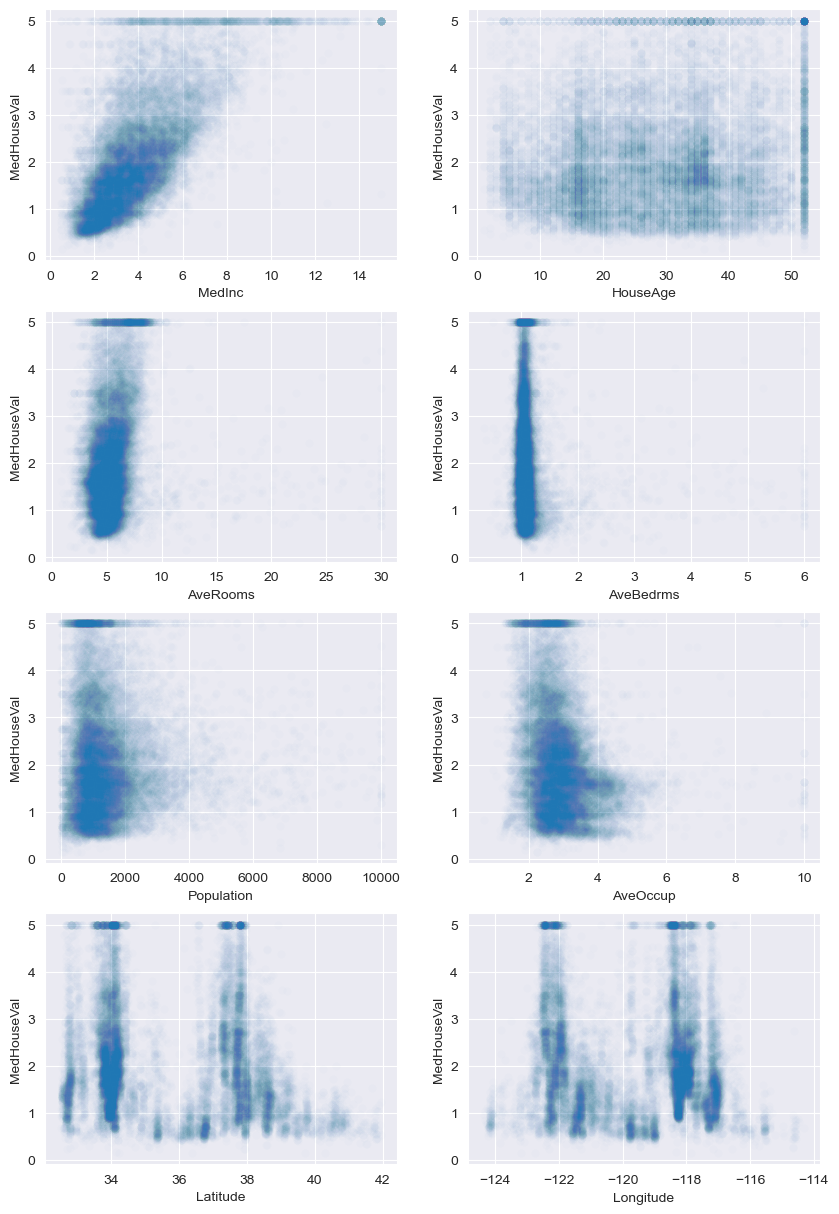

In [32]:
fig, axes = plt.subplots(4,2,figsize=(10,15))
axes_flat = axes.flatten()
for ix, feat in enumerate(data.feature_names):
    sns.scatterplot(df, x=feat, y='MedHouseVal', ax=axes_flat[ix], alpha=0.01)

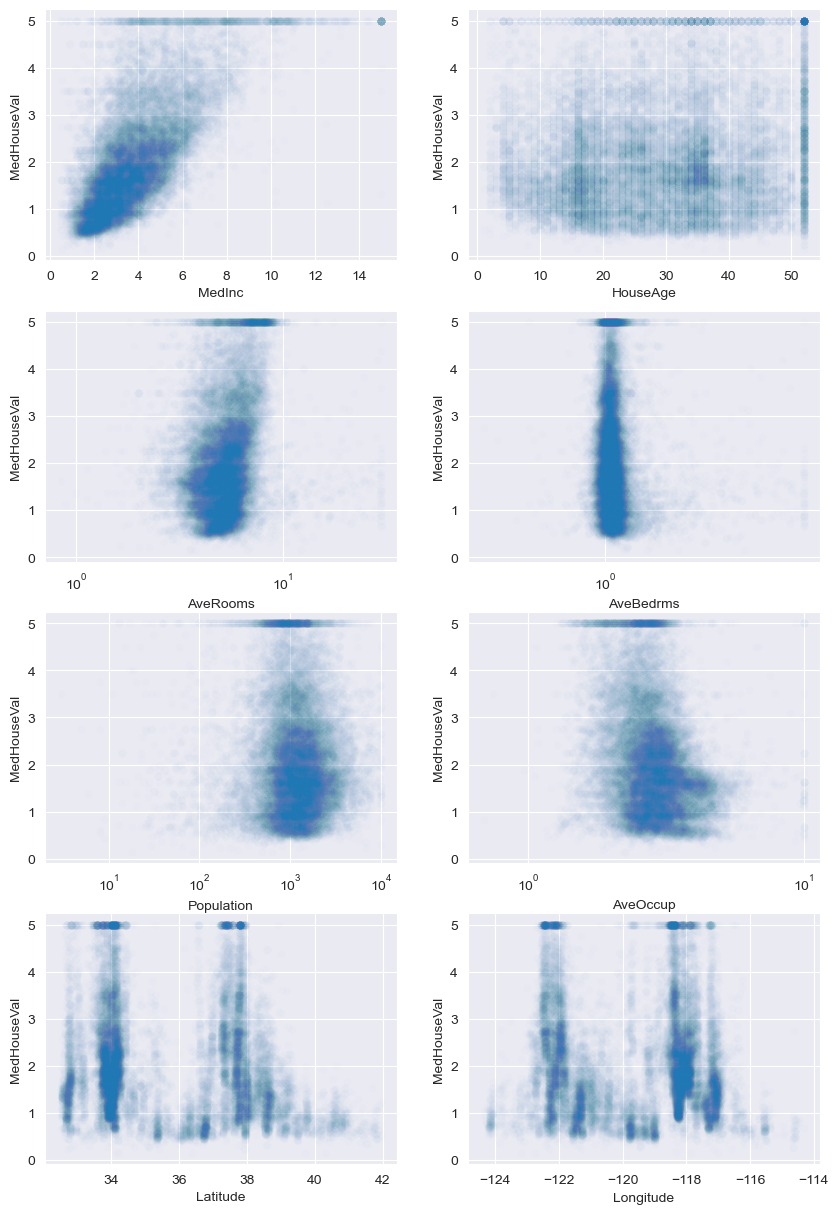

In [33]:
axes_flat[2].set_xscale('log')
axes_flat[3].set_xscale('log')
axes_flat[4].set_xscale('log')
axes_flat[5].set_xscale('log')

fig

## Model Fitting

In [34]:
from sklearn.pipeline import Pipeline

import sklearn.preprocessing

import sklearn.model_selection as skms
import sklearn.metrics as skm
import sklearn.linear_model as skl


In [35]:
results = []

# degree = [2, 3, 4, 5, 6, 7]
# splits = [5, 10, 15, 20, 25]
alphas = np.logspace(-4, 1, 8)
degrees = [1, 2, 3]
splits = [2, 5, 10]
linRegTypes = ['linreg', 'ridge', 'lasso']

for linRegType in linRegTypes:
    for deg in degree:
        for alpha in alphas:
            for split in splits:
                pipeline : Pipeline
                if linRegType == 'linreg':
                    pipeline = Pipeline([
                        ('polyBase', sklearn.preprocessing.PolynomialFeatures(degree=deg, include_bias=False)),
                        ('scale', sklearn.preprocessing.StandardScaler()),
                        ('linReg', skl.LinearRegression(fit_intercept=True)),
                    ])

                result = skms.cross_validate(
                    pipeline,
                    X = df[data.feature_names],
                    y = df['MedHouseVal'],
                    cv = skms.KFold(n_splits=split, shuffle=False),
                    scoring = 'r2',
                    return_train_score = True
                )
                result['train_score'].mean(), result['test_score'].mean()

                results.append(result)

                tqdm

KeyboardInterrupt: 

In [18]:
train_df, test_df = skms.train_test_split(df)

pipeline.fit(train_df[data.feature_names], train_df['MedHouseVal'])

test_df['Prediction'] = pipeline.predict(test_df[data.feature_names])
train_df['Prediction'] = pipeline.predict(train_df[data.feature_names])

## Evaluation

Text(0.5, 1.0, 'Test data')

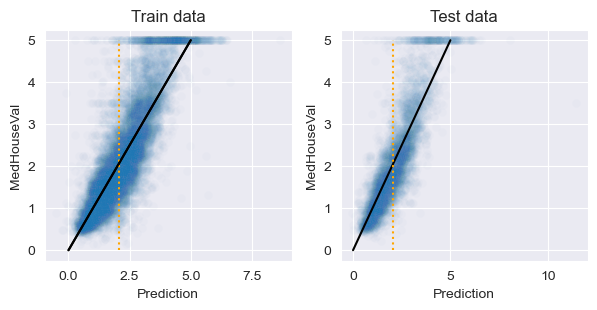

In [19]:
fig, axes = plt.subplots(1,2,figsize=(7,3))

ax = axes[0]
_ = sns.scatterplot(train_df, x='Prediction', y='MedHouseVal', alpha=0.02, ax=ax)
ax.plot([0,5], [0,5], color = 'k')
mean_train = train_df['MedHouseVal'].mean()
ax.plot([mean_train, mean_train], [0, 5], color='orange', ls=':')
ax.plot([0,5], [0,5], color = 'k')

ax.set_title('Train data')

ax = axes[1]
_ = sns.scatterplot(test_df, x='Prediction', y='MedHouseVal', alpha=0.02, ax=ax)
_ = ax.plot([0,5], [0,5], color = 'k')
mean_test = test_df['MedHouseVal'].mean()
ax.plot([mean_test, mean_test], [0, 5], color='orange', ls=':')
ax.set_title('Test data')